In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [2]:
df= pd.read_csv('df_glucose_imputed.csv')

In [3]:
#Let's see what we have left in missing values
df.isnull().sum()

Unnamed: 0           0
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose              0
TenYearCHD           0
dtype: int64

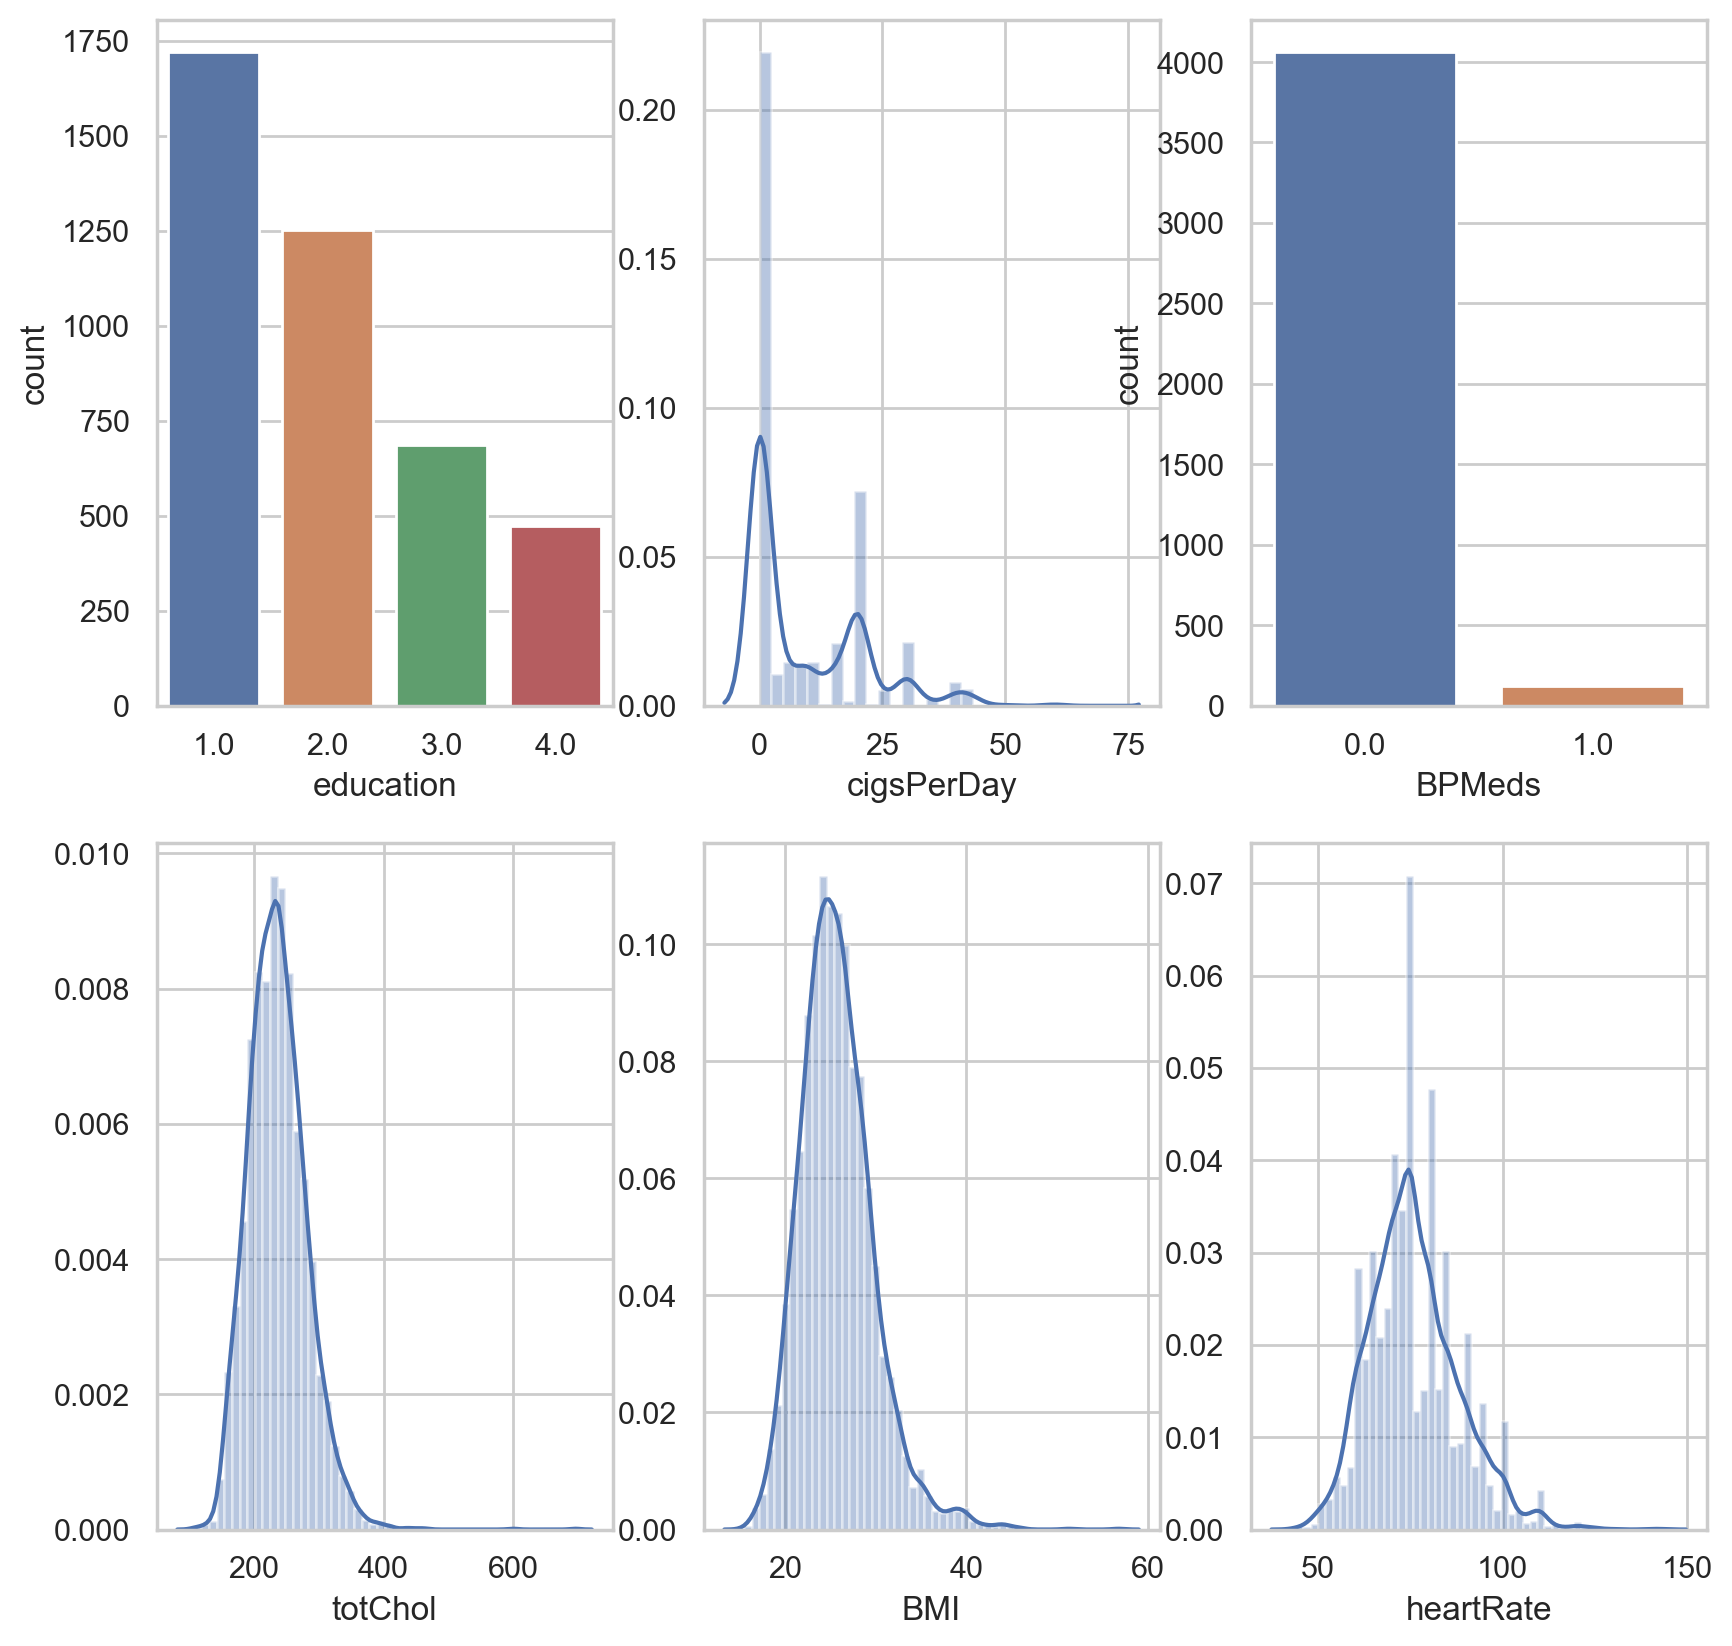

In [4]:
#Let's plot them out
plt.figure(figsize=(10,10), dpi=200)
plt.subplot(2,3,1)
sns.countplot(df['education'])
plt.subplot(2,3,2)
sns.distplot(df['cigsPerDay'].dropna())
plt.subplot(2,3,3)
sns.countplot(df['BPMeds'].dropna())
plt.subplot(2,3,4)
sns.distplot(df['totChol'].dropna())
plt.subplot(2,3,5)
sns.distplot(df['BMI'].dropna())
plt.subplot(2,3,6)
sns.distplot(df['heartRate'].dropna())

In [5]:
# No we can infer that all of the continous variables have outliers, 
# so we will impute them with Median 
# Discrete values will be imputed with modes
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['heartRate'].fillna(df['heartRate'].median(), inplace = True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace = True)
df['totChol'].fillna(df['totChol'].median(), inplace = True)


In [6]:
df.isna().sum()

Unnamed: 0         0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
checkpoint1 = df.copy()

In [8]:
#Let's now divide values into X and y, and train_test_split

y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)

In [9]:
#Now, let's perform logistic regression and see score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
lg = LogisticRegression()
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)
accuracy_score(y_test, predictions)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8594339622641509

In [10]:
#Accuracy score is quite high, let's see confusion classification report
#and confusion matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       903
           1       0.72      0.08      0.15       157

    accuracy                           0.86      1060
   macro avg       0.79      0.54      0.54      1060
weighted avg       0.84      0.86      0.81      1060



In [11]:
print(confusion_matrix(y_test, predictions))

[[898   5]
 [144  13]]


In [12]:
#What we can see from here, we can easily predict if patient does not have CHD
#But we cannot predict if he has CHD
#F1 score here helps us. For 0 our accuracy is 92%, for 1 is 15%
#What is our mistake
#Let's have a closer look

In [13]:
len(df[df['TenYearCHD']==1])

644

In [14]:
len(df[df['TenYearCHD']==0])

3594

In [15]:
#Here it is, our y variables are imbalanced
#So, if our model was saying only 0 its mistake would be very low
# as to be exactly 644/(644+3594) = 15%
# So, we have to balance our dataset
# For this purpose we will take only sample of data having y==0

In [16]:
df1 = df[df['TenYearCHD']==0] ###
df1 = df1.sample(644)         ### y == 0, dataset=644
df2 = df[df['TenYearCHD']==1] ### y == 1, dataset=644
dfs = [df1, df2]
df_final = pd.concat(dfs, axis=0)

In [17]:
checkpoint2 = df_final.copy()

In [18]:
df = checkpoint2

In [19]:
len(df) #so, our dataset has 1288 observations

1288

In [20]:
#Lets perform logistic regression again
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)
lg = LogisticRegression()
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)
accuracy_score(y_test, predictions)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6739130434782609

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       173
           1       0.63      0.70      0.66       149

    accuracy                           0.67       322
   macro avg       0.67      0.68      0.67       322
weighted avg       0.68      0.67      0.67       322



In [22]:
print(confusion_matrix(y_test, predictions))

[[113  60]
 [ 45 104]]


In [23]:
#So, for now, our prediction power to truly predict y=1 is 66%(better than 15%)
#Although our overall accuracy score dropped (but it was not real, now it is)
#We need more data and other variables to have better predictions
#Or change treshold

In [24]:
df.to_csv('balanced_y')